## ข้อ 2

<font size="4">2.1) รถคันนี้น่าจะกินน้ำมันเท่าใด (กี่ไมล์/แกลลอน (MPG)) </font>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/car-mpg.csv')
df.isnull().sum()

Make          0
DriveTrain    0
EngineSize    0
Cylinders     2
Horsepower    0
MPG           0
Weight        0
Wheelbase     0
Length        0
dtype: int64

In [4]:
#fill null values
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mean())

In [5]:
#ปรับให้เป็น z-score
co = ['EngineSize', 'Cylinders', 'Horsepower', 'Weight', 'Wheelbase', 'Length']
for c in co:
    df[c] = (df[c]-df[c].mean()) / df[c].std()

In [6]:
#ลบcolumn Make ทิ้งเพราะในข้อมูล test ไม่มีบอก
X = df.drop(columns=['MPG','Make'])
y = df['MPG']

In [7]:
#ทำ one-hot encoding
X = pd.get_dummies(X,prefix = ['DriveTrain'], columns = ['DriveTrain'])
X.head()

,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,0.273563,0.123803,0.683703,1.150285,-0.259174,0.183720,1,0,0
1,-1.079501,-1.162545,-0.221136,-1.053980,-0.860727,-1.000290,0,1,0
2,-0.718684,-1.162545,-0.221136,-0.458447,-0.379485,-0.234166,0,1,0
3,0.002951,0.123803,0.753306,-0.003891,-0.018553,-0.025223,0,1,0
4,0.273563,0.123803,0.126879,0.397962,0.823622,0.740901,0,1,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

In [29]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=2500, depth = 9,learning_rate = 0.04627823525262093, loss_function='RMSE', verbose = 500, random_seed = 777)
cat_model.fit(X_train, y_train,eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 5.3328917	test: 4.0241423	best: 4.0241423 (0)	total: 6.38ms	remaining: 15.9s
500:	learn: 0.3846745	test: 1.1431834	best: 1.1431834 (500)	total: 1.99s	remaining: 7.95s
1000:	learn: 0.1192010	test: 1.1061383	best: 1.1061284 (992)	total: 4.27s	remaining: 6.4s
1500:	learn: 0.0517035	test: 1.1011955	best: 1.1011955 (1500)	total: 6.66s	remaining: 4.43s
2000:	learn: 0.0248165	test: 1.1002094	best: 1.1000621 (1778)	total: 9.08s	remaining: 2.26s
2499:	learn: 0.0125061	test: 1.0997568	best: 1.0997055 (2461)	total: 11.5s	remaining: 0us

bestTest = 1.099705532
bestIteration = 2461

Shrink model to first 2462 iterations.


In [31]:
#ในเมื่อปรับจูน model จนดีแล้ว จึงใช้ข้อมูลทั้งหมดในการเทรน
cat_model = CatBoostRegressor(iterations=2500, depth=9,learning_rate=0.04627823525262093, loss_function='RMSE', verbose=500 , random_seed = 777)
cat_model.fit(X, y)

0:	learn: 5.0887000	total: 7.27ms	remaining: 18.2s
500:	learn: 0.4311017	total: 2.09s	remaining: 8.34s
1000:	learn: 0.1572416	total: 4.57s	remaining: 6.84s
1500:	learn: 0.0842672	total: 6.91s	remaining: 4.6s
2000:	learn: 0.0538282	total: 9.27s	remaining: 2.31s
2499:	learn: 0.0413316	total: 11.8s	remaining: 0us


Preprocessing ข้อมูล test ก่อนทำการ predict

In [41]:
# Preprocessing ข้อมูล test ก่อนทำการ predict
df = pd.read_csv('data/car-mpg.csv')
df['Cylinders']=df['Cylinders'].fillna(df['Cylinders'].mean())
X_pred = [2.8,4.,150.,2500.,108.,172.,0.,1.,0.]
i=0
for c in co:
    X_pred[i] = (X_pred[i]-df[c].mean()) / df[c].std() #z-score
    i+=1
X_pred=np.array(X_pred)
X_pred

array([-0.35786655, -1.16254501, -0.91716528, -1.4202597 , -0.01855258,
       -1.00028961,  0.        ,  1.        ,  0.        ])

In [42]:
# predict 
y_pred = cat_model.predict([X_pred])

<font size="4">คำตอบ</font>

In [43]:
#ans
print("รถคันนี้กินน้ำมันประมาณ {:.2f} MPG".format(y_pred[0]))

รถคันนี้กินน้ำมันประมาณ 25.79 MPG


<font size="4">2.2) วิเคราะห์ผลที่ได้รวมถึงน้ำหนักของแต่ละปัจจัย</font>

In [44]:
#ดึงน้ำหนักแต่ละ feature ที่มีผลต่อคำตอบ
importance = cat_model.feature_importances_
importance

array([18.61549188,  5.67082254, 29.71636349, 20.76737423,  7.26174909,
        8.82294591,  1.39412489,  5.0215862 ,  2.72954176])

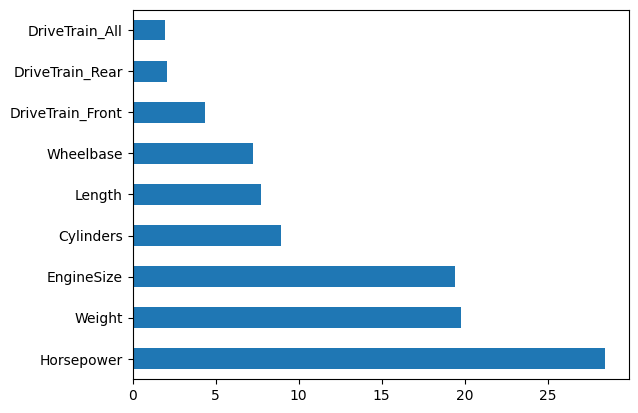

In [295]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(importance, index=['EngineSize', 'Cylinders', 'Horsepower', 'Weight', 'Wheelbase', 'Length','DriveTrain_All','DriveTrain_Front','DriveTrain_Rear'])

feature_importances.nlargest(10).plot(kind='barh')

plt.show()

<font size="3">จากกราฟพบว่า Horusepower มีน้ำหนักมากสุด ตามมาด้วย weight, Enginesize ตามลำดับ</font>